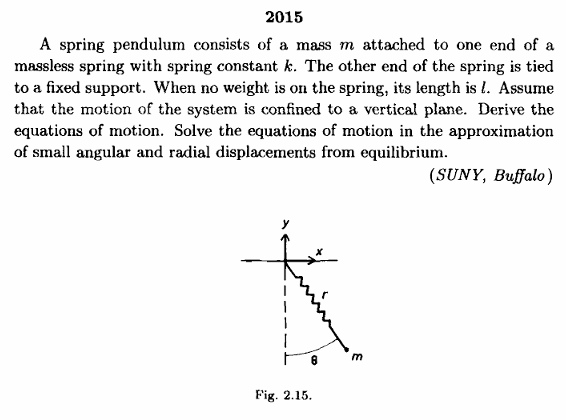

# design

T =  0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)


V =  -g*m*r(t)*cos(theta(t)) + 0.5*k*(-l + r(t))**2


L =  g*m*r(t)*cos(theta(t)) - 0.5*k*(-l + r(t))**2 + 0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)


eqR =  -g*m*cos(theta(t)) + 0.5*k*(-2*l + 2*r(t)) - 1.0*m*r(t)*Derivative(theta(t), t)**2 + 1.0*m*Derivative(r(t), (t, 2))


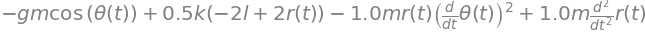

eqTheta =  g*m*r(t)*sin(theta(t)) + 1.0*m*r(t)**2*Derivative(theta(t), (t, 2)) + 2.0*m*r(t)*Derivative(r(t), t)*Derivative(theta(t), t)


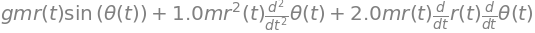

eqTheta after division =  g*sin(theta(t)) + 1.0*r(t)*Derivative(theta(t), (t, 2)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t)


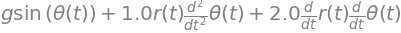

SolR =  [(k*l - k*r(t) + m*(g*cos(theta(t)) + r(t)*Derivative(theta(t), t)**2))/m]


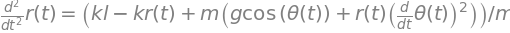

SolTheta =  [-(g*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t)]


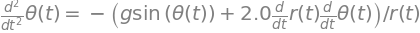

EqR =  Eq(Derivative(r(t), (t, 2)), (k*l - k*r(t) + m*(g*cos(theta(t)) + r(t)*Derivative(theta(t), t)**2))/m)


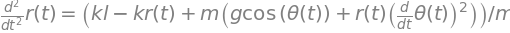

EqTheta =  Eq(Derivative(theta(t), (t, 2)), -(g*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t))


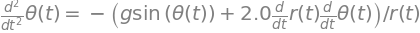

EqR =  Eq(Derivative(r(t), (t, 2)), r(t)*Derivative(theta(t), t)**2 - r(t) + 9.81*cos(theta(t)) + 1)


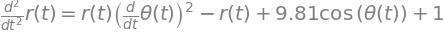

EqTheta =  Eq(Derivative(theta(t), (t, 2)), -(9.81*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t))


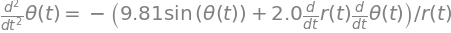

r0 =  10.81


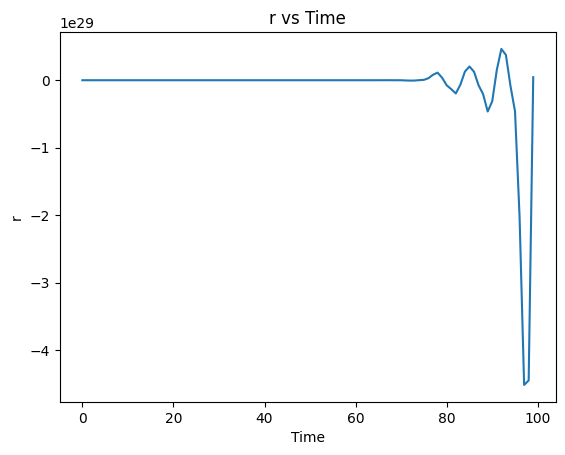

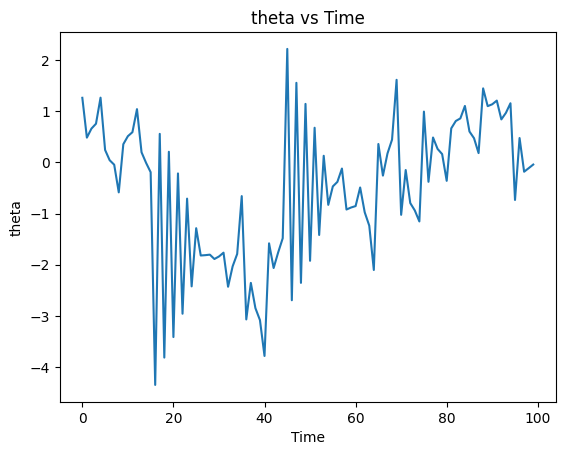

In [5]:
import numpy as np
import sympy as sp



# Define the symbols
from sympy import *
init_printing(use_unicode=True)



# Define the variables
m, k, l, g, t = symbols("m k l g t")

theta = Function("theta")(t)
r = Function("r")(t)

# Kinetic energy (T) and potential energy (V) equations
T = 0.5 * m * (r.diff(t) ** 2 + (r * theta.diff(t)) ** 2)
V = 0.5 * k * (r - l) ** 2 - m * g * r * cos(theta)

print("T = ", T)
display(T)
print("V = ", V)
display(V)

# Lagrangian equation
L = T - V
print("L = ", L)
display(L)

# Euler-Lagrange equation
thetaDot = theta.diff(t)
thetaDdot = thetaDot.diff(t)

rDot = r.diff(t)
rDdot = rDot.diff(t)

eqR = diff(diff(L, rDot), t) - diff(L, r)
eqTheta = diff(diff(L, thetaDot), t) - diff(L, theta)

print("eqR = ", eqR)
display(eqR)
print("eqTheta = ", eqTheta)
display(eqTheta)

# # divide eqTheta by r and m
eqTheta = simplify(eqTheta / (r * m))

print("eqTheta after division = ", eqTheta)
display(eqTheta)

# solve the equations
solR = solve(eqR, rDdot)
solTheta = solve(eqTheta, thetaDdot)

eqSolR = Eq(rDdot, solR[0])
eqSolTheta = Eq(thetaDdot, solTheta[0])

print("SolR = ", solR)
display(eqSolR)
print("SolTheta = ", solTheta)
display(eqSolTheta)

print("EqR = ", eqSolR)
display(eqSolR)
print("EqTheta = ", eqSolTheta)
display(eqSolTheta)

# do numerical calculations using euler method

# define values
mVal = 1
kVal = 1
lVal = 1
gVal = 9.81

# input values into the equations
eqSolR = eqSolR.subs({m: mVal, k: kVal, l: lVal, g: gVal})
eqSolTheta = eqSolTheta.subs({m: mVal, k: kVal, l: lVal, g: gVal})

print("EqR = ", eqSolR)
display(eqSolR)
print("EqTheta = ", eqSolTheta)
display(eqSolTheta)

# define the time step
dt = 1
t0 = 0
t1 = 100

# define the initial values
r0Val = lVal + (mVal * gVal / kVal)
rDot0Val = 2
theta0Val = 0
thetaDot0Val = 2

print("r0 = ", r0Val)

# define the arrays
rArr = [r0Val]
thetaArr = [theta0Val]

# do euler method
tArr = np.arange(t0, t1, dt)


for tVal in tArr:
    rVal = rArr[-1]
    thetaVal = thetaArr[-1]

    calRDot = eqSolR.rhs.subs({r: rVal, rDot: rDot0Val, theta: sp.rad(thetaVal), thetaDot: thetaDot0Val}).evalf()
    calThetaDot = eqSolTheta.rhs.subs({r: rVal, rDot: rDot0Val, theta: sp.rad(thetaVal), thetaDot: thetaDot0Val}).evalf()

    rDotVal = rDot0Val + calRDot * dt
    thetaDotVal = thetaDot0Val + calThetaDot * dt

    rArr.append(rVal + rDotVal * dt)
    thetaArr.append(thetaVal + thetaDotVal * dt)

    rDot0Val = rDotVal
    thetaDot0Val = thetaDotVal

# plot the results
import matplotlib.pyplot as plt

plt.plot(tArr, rArr[1:])
plt.xlabel("Time")
plt.ylabel("r")
plt.title("r vs Time")
plt.show()

plt.plot(tArr, thetaArr[1:])
plt.xlabel("Time")
plt.ylabel("theta")
plt.title("theta vs Time")
plt.show()

# build function

In [6]:
import numpy as np
import sympy as sp
from sympy import symbols, Function, diff, solve, Eq, cos
import matplotlib.pyplot as plt
import math

def calculateLagrange(T, V, mVal, kVal, lVal, gVal, dt, t0, t1, r0Val=0, rDot0Val=0, theta0Val=0, thetaDot0Val=0):
    # Define the symbols
    t = symbols("t")
    theta = Function("theta")(t)
    r = Function("r")(t)

    print("T = ", T)
    display(T)
    print("V = ", V)
    display(V)

    # Lagrangian equation
    L = T - V

    print("L = ", L)

    # Euler-Lagrange equation
    thetaDot = theta.diff(t)
    thetaDdot = thetaDot.diff(t)
    rDot = r.diff(t)
    rDdot = rDot.diff(t)
    eqR = diff(diff(L, rDot), t) - diff(L, r)
    eqTheta = diff(diff(L, thetaDot), t) - diff(L, theta)

    print("eqR = ", eqR)
    print("eqTheta = ", eqTheta)

    # divide eqTheta by r and m
    eqTheta = simplify(eqTheta / (r * m))

    print("eqTheta after division = ", eqTheta)

    # solve the equations
    solR = solve(eqR, rDdot)
    solTheta = solve(eqTheta, thetaDdot)

    eqSolR = Eq(rDdot, solR[0])
    eqSolTheta = Eq(thetaDdot, solTheta[0])

    print("SolR = ", solR)
    print("SolTheta = ", solTheta)

    print("EqR = ", eqSolR)
    print("EqTheta = ", eqSolTheta)

    # input values into the equations
    eqSolR = eqSolR.subs({m: mVal, k: kVal, l: lVal, g: gVal})
    eqSolTheta = eqSolTheta.subs({m: mVal, k: kVal, l: lVal, g: gVal})

    print("EqR = ", eqSolR)
    print("EqTheta = ", eqSolTheta)

    # define the time step
    dt = dt
    t0 = t0
    t1 = t1

    # define the initial values
    r0Val = r0Val
    rDot0Val = rDot0Val
    theta0Val = theta0Val
    thetaDot0Val = thetaDot0Val

    # define the arrays
    rArr = [r0Val]
    rDotArr = [rDot0Val]
    thetaArr = [theta0Val]
    thetaDotArr = [thetaDot0Val]

    # do euler method
    tArr = np.arange(t0, t1, dt)

    for i in range(len(tArr)):
        rVal = rArr[-1]
        thetaVal = thetaArr[-1]

        calRDot = eqSolR.rhs.subs({r: rVal, rDot: rDot0Val, theta: sp.rad(thetaVal), thetaDot: thetaDot0Val}).evalf()
        calThetaDot = eqSolTheta.rhs.subs({r: rVal, rDot: rDot0Val, theta: sp.rad(thetaVal), thetaDot: thetaDot0Val}).evalf()

        rDotVal = rDot0Val + calRDot * dt
        thetaDotVal = thetaDot0Val + calThetaDot * dt

        rArr.append(rVal + rDotVal * dt)
        thetaArr.append(thetaVal + thetaDotVal * dt)
        rDotArr.append(rDotVal)
        thetaDotArr.append(thetaDotVal)

        rDot0Val = rDotVal
        thetaDot0Val = thetaDotVal

    return rArr, thetaArr, rDotArr, thetaDotArr, tArr

def plot_data(tArr, rArr, thetaArr, rDotArr, thetaDotArr, mVal, kVal, lVal, gVal):
    # create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))

    # plot r vs Time
    axs[0, 0].plot(tArr, rArr[1:], color="green")
    axs[0, 0].set_xlabel("Time")
    axs[0, 0].set_ylabel("r")
    axs[0, 0].set_title("r vs Time")

    # plot theta vs Time
    axs[0, 1].plot(tArr, thetaArr[1:], color="orange")
    axs[0, 1].set_xlabel("Time")
    axs[0, 1].set_ylabel("theta")
    axs[0, 1].set_title("theta vs Time")

    # plot rDot vs Time
    axs[1, 0].plot(tArr, rDotArr[1:], color="red")
    axs[1, 0].set_xlabel("Time")
    axs[1, 0].set_ylabel("rDot")
    axs[1, 0].set_title("rDot vs Time")

    # plot thetaDot vs Time
    axs[1, 1].plot(tArr, thetaDotArr[1:], color="blue")
    axs[1, 1].set_xlabel("Time")
    axs[1, 1].set_ylabel("thetaDot")
    axs[1, 1].set_title("thetaDot vs Time")

    # display the subplots
    plt.tight_layout()
    fig.suptitle("Plots for m={}, k={}, l={}, g={}".format(mVal, kVal, lVal, gVal))
    plt.show()


def degrees_to_radians(degrees):
    return degrees * math.pi / 180

# call function and plot

T =  0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)


V =  -g*m*r(t)*cos(theta(t)) + 0.5*k*(-l + r(t))**2


L =  g*m*r(t)*cos(theta(t)) - 0.5*k*(-l + r(t))**2 + 0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)
eqR =  -g*m*cos(theta(t)) + 0.5*k*(-2*l + 2*r(t)) - 1.0*m*r(t)*Derivative(theta(t), t)**2 + 1.0*m*Derivative(r(t), (t, 2))
eqTheta =  g*m*r(t)*sin(theta(t)) + 1.0*m*r(t)**2*Derivative(theta(t), (t, 2)) + 2.0*m*r(t)*Derivative(r(t), t)*Derivative(theta(t), t)
eqTheta after division =  g*sin(theta(t)) + 1.0*r(t)*Derivative(theta(t), (t, 2)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t)
SolR =  [(k*l - k*r(t) + m*(g*cos(theta(t)) + r(t)*Derivative(theta(t), t)**2))/m]
SolTheta =  [-(g*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t)]
EqR =  Eq(Derivative(r(t), (t, 2)), (k*l - k*r(t) + m*(g*cos(theta(t)) + r(t)*Derivative(theta(t), t)**2))/m)
EqTheta =  Eq(Derivative(theta(t), (t, 2)), -(g*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t))
EqR =  Eq(Derivative(r(t), (t, 2)), r(t)*Derivative(theta(t), t)**2 - 2*r(t) + 9.81*cos(

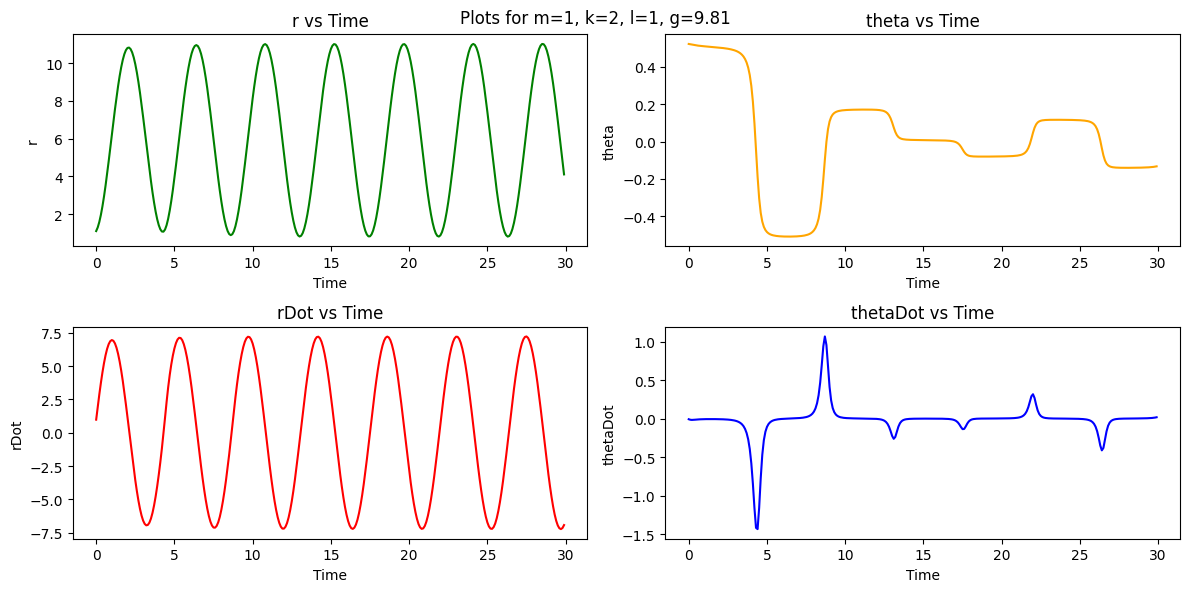

In [7]:
# Define the variables
m, k, l, g = symbols("m k l g")
t = symbols("t")
theta = Function("theta")(t)
r = Function("r")(t)

# Kinetic energy (T) and potential energy (V) equations
T = 0.5 * m * (r.diff(t) ** 2 + (r * theta.diff(t)) ** 2)
V = 0.5 * k * (r - l) ** 2 - m * g * r * cos(theta)

mVal = 1
kVal = 2
lVal = 1
gVal = 9.81

r0 = 1
rDot0Val = 0
theta0Val = degrees_to_radians(30)
thetaDot0Val = 0

dt = 0.1
t0 = 0
t1 = 30

# Call the function
rArr, thetaArr, rDotArr, thetaDotArr, tArr = calculateLagrange(
    T=T,
    V=V,
    mVal=mVal,
    kVal=kVal,
    lVal=lVal,
    gVal=gVal,
    dt=dt,
    t0=t0,
    t1=t1,
    r0Val=r0,
    rDot0Val=rDot0Val,
    theta0Val=theta0Val,
    thetaDot0Val=thetaDot0Val
)

plot_data(tArr, rArr, thetaArr, rDotArr, thetaDotArr, mVal, kVal, lVal, gVal)

# Animation

MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

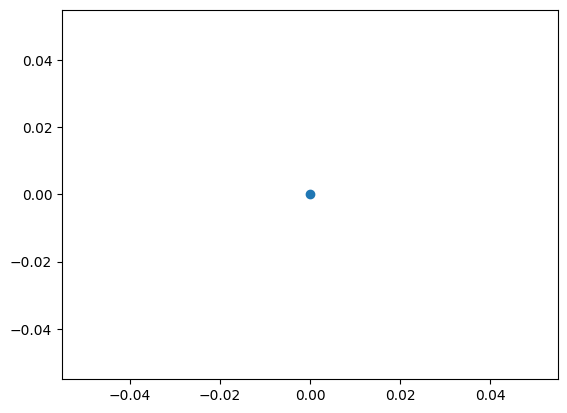

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a new figure for the animation
fig, ax = plt.subplots()

# Initialize the pendulum line
line, = ax.plot([], [], 'o-')

# Animation initialization function
def init():
    line.set_data([], [])
    return line,

# Animation update function
def update(num):
    r = float(rArr[num])
    theta = float(thetaArr[num])
    x = r * np.sin(theta)
    y = -r * np.cos(theta)
    line.set_data([0, x], [0, y])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(tArr), init_func=init, blit=True)

# Save the animation
ani.save('pendulum.gif', writer='imagemagick')

# Display the animation
plt.show()